In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset 

In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# Inserting Age as Age = Rings + 1.5
df['Age']=df['Rings']+1.5

In [4]:
df.Sex.value_counts
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [5]:
df.shape

(4177, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


# Visualizations

## Univariate Analysis

In [7]:
# Taking first 500 data
test1 = df[:500]

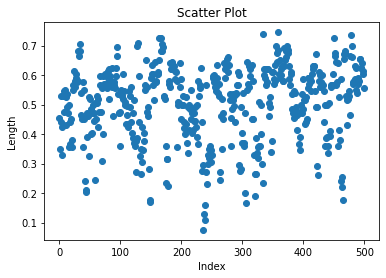

In [8]:
plt.title('Scatter Plot')

plt.xlabel('Index')
plt.ylabel('Length')

plt.scatter(test1.index, test1.Length)

(array([  4.,  38., 129., 148.,  70.,  61.,  35.,  13.,   1.,   1.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

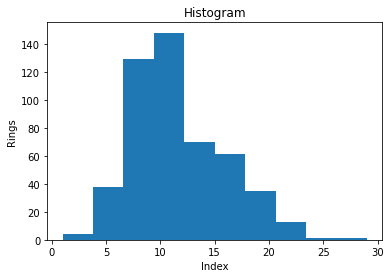

In [9]:
plt.title('Histogram')

plt.xlabel('Index')
plt.ylabel('Rings')
plt.hist(test1.Rings)

## Bi - Variate Analysis

In [10]:
# Taking second 500 data
test2 = df[500:1000]

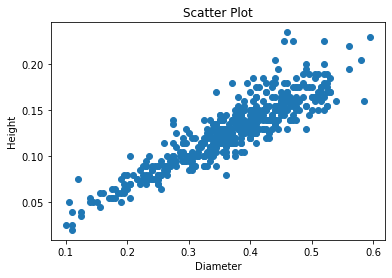

In [11]:
plt.title('Scatter Plot')

plt.xlabel('Diameter')
plt.ylabel('Height')
plt.scatter(test2.Diameter, test2.Height)

In [12]:
#Correlation Coefficients
test2.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Length,1.000000,0.989631,0.896933,0.924764,0.888385,0.911674,0.906317,0.575695,0.575695
Diameter,0.989631,1.000000,0.901094,0.930857,0.896128,0.913371,0.913094,0.576129,0.576129
Height,0.896933,0.901094,1.000000,0.848955,0.793011,0.840414,0.850378,0.617452,0.617452
Whole weight,0.924764,0.930857,0.848955,1.000000,0.968753,0.959402,0.965382,0.531869,0.531869
Shucked weight,0.888385,0.896128,0.793011,0.968753,1.000000,0.917626,0.897291,0.393923,0.393923
Viscera weight,0.911674,0.913371,0.840414,0.959402,0.917626,1.000000,0.914778,0.517968,0.517968
Shell weight,0.906317,0.913094,0.850378,0.965382,0.897291,0.914778,1.000000,0.619004,0.619004
Rings,0.575695,0.576129,0.617452,0.531869,0.393923,0.517968,0.619004,1.000000,1.000000
Age,0.575695,0.576129,0.617452,0.531869,0.393923,0.517968,0.619004,1.000000,1.000000


## Multi - Variate Analysis

In [13]:
# Taking third 500 data
test3 = df[1000:1500]

<AxesSubplot:xlabel='Length', ylabel='Height'>

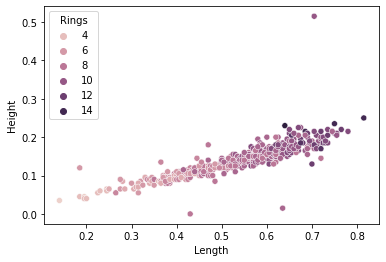

In [14]:
sns.scatterplot(data = test3, x = 'Length', y = 'Height', hue = 'Rings')

# Descriptive Statistics 

In [15]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


# Handle Missing Values

In [16]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
Age               False
dtype: bool

In [17]:
# There are no null values
# In case any null values,
# df[<column_name>] = df[<column_name>].fillna(df[<column_name>].mean())

# Outliers

<AxesSubplot:xlabel='Age'>

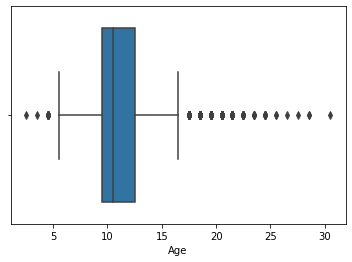

In [18]:
# Identify the outliers
sns.boxplot(df['Age'],data=df)

<AxesSubplot:xlabel='Age'>

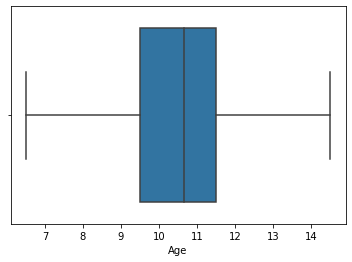

In [19]:
# Outliers is identified as values greater than 15 and lesser than 4
# Replacing them with Mean

df['Age'] = np.where(df['Age']>15, df['Age'].mean(), df['Age'])
df['Age'] = np.where(df['Age']<6, df['Age'].mean(), df['Age'])
sns.boxplot(df.Age)


# Categorical Columns and Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Sex=le.fit_transform(df.Sex)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,11.433684
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.500000
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.500000
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.500000
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.500000


# Dependent and Independent variables.

In [21]:
# Whole Weight is a dependent variable 
dep_var = df['Whole weight']
dep_var

0       0.5140
1       0.2255
2       0.6770
3       0.5160
4       0.2050
         ...  
4172    0.8870
4173    0.9660
4174    1.1760
4175    1.0945
4176    1.9485
Name: Whole weight, Length: 4177, dtype: float64

In [22]:
# Rings is an independent variable
y = df['Age']
y

0       11.433684
1        8.500000
2       10.500000
3       11.500000
4        8.500000
          ...    
4172    12.500000
4173    11.500000
4174    10.500000
4175    11.500000
4176    13.500000
Name: Age, Length: 4177, dtype: float64

In [23]:
X=df.drop(columns = ['Age'], axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Scaling

In [24]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X=X)
X_scaled=pd.DataFrame(scaled,columns=X.columns)
X_scaled.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,1.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.0,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,1.0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.5,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


# Train, Test Data Split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,dep_var,test_size=0.3,random_state=0)

In [26]:
X_train.shape

(2923, 9)

In [27]:
y_train.shape

(2923,)

In [28]:
X_test.shape

(1254, 9)

In [29]:
y_test.shape

(1254,)

In [30]:
Model = LinearRegression()

In [31]:
Model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = Model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_pred, y_test))

1.7209649542236967e-15